# NLP Basics

In [20]:
#  Si no tenemos el módulo podemos descargarlo mediante:
# ! pip install nltk
# ! pip install wordcloud

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import pos_tag
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('cess_esp')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

- Tienes las reviews de varias peliculas etiquetadas como postivas y negativas, verifica en base a estas técnicas que la clasificaición es correcta y haz un wordcloud con los adjetivos más frecuentes

In [23]:
reviews_pos = []
reviews_neg = []

with open(r'/content/drive/MyDrive/Colab Notebooks/Machine_learning/NLP/reviews.txt', "r", encoding='utf-8') as file:
    for line in file:
        trozos = line.split('\t')
        if trozos[0] == '0':
            # Negativos
            reviews_neg.append(trozos[1].lower())
        elif trozos[0] == '1':
            # Positivos
            reviews_pos.append(trozos[1].lower())

In [24]:
reviews_neg[:10]

['da vinci code was a terrible movie.\n',
 'then again, the da vinci code is super shitty movie, and it made like 700 million.\n',
 'the da vinci code comes out tomorrow, which sucks.\n',
 'i thought the da vinci code movie was really boring.\n',
 "god, yahoo games has this truly-awful looking da vinci code-themed skin on it's chessboard right now.\n",
 'da vinci code does suck.\n',
 'and better...-we all know da vinci code is bogus and inaccurate.\n',
 'last time, da vinci code is also a bit disappointing to me, because many things written in the book is never mentioned in movie.\n',
 'and better...-we all know da vinci code is bogus and inaccurate.\n',
 'and better..-we all know da vinci code is bogus and inaccurate.\n']

In [25]:
reviews_neg_join = "".join(reviews_neg).replace("\n", "")
reviews_pos_join = "".join(reviews_pos).replace("\n", "")

In [26]:
reviews_neg_join[:3000]

'da vinci code was a terrible movie.then again, the da vinci code is super shitty movie, and it made like 700 million.the da vinci code comes out tomorrow, which sucks.i thought the da vinci code movie was really boring.god, yahoo games has this truly-awful looking da vinci code-themed skin on it\'s chessboard right now.da vinci code does suck.and better...-we all know da vinci code is bogus and inaccurate.last time, da vinci code is also a bit disappointing to me, because many things written in the book is never mentioned in movie.and better...-we all know da vinci code is bogus and inaccurate.and better..-we all know da vinci code is bogus and inaccurate.and better..-we all know da vinci code is bogus and inaccurate.if jesus is fabricated a la the da vinci code then christianity is worthless...i think this bolsters my arguments that both england and the da vinci code sucks...and better..-we all know da vinci code is bogus and inaccurate.i really hate the da vinci code.the more you sa

In [27]:
w_rev_neg = word_tokenize(reviews_neg_join)

In [28]:
rev_neg_filtered = []

separators = [",", ".", "!", "?", "¿", "..."]
nm_words = ["da", "vinci", "code", "mountain", "harry", "guy", "potter", "code", "brokeback", "mission", "impossible", "left", "right"]

for w in w_rev_neg:
  if w.lower() in separators:
    pass
  elif w.lower() in stopwords.words("english"):
    pass
  elif w.lower() in nm_words:
    pass
  elif len(w) < 3:
    pass
  else:
    rev_neg_filtered.append(w)

In [29]:
freq_w_rev_neg = FreqDist(rev_neg_filtered)
freq_w_rev_neg.most_common(20)

[('hate', 571),
 ('sucked', 571),
 ('sucks', 414),
 ('movie', 376),
 ('stupid', 356),
 ('much', 264),
 ('suck', 189),
 ('really', 188),
 ('horrible', 177),
 ('movies', 172),
 ('terrible', 170),
 ('fucking', 169),
 ('think', 112),
 ('know', 101),
 ('one', 101),
 ('depressing', 101),
 ('heard', 94),
 ('went', 90),
 ('way', 89),
 ('ever', 88)]

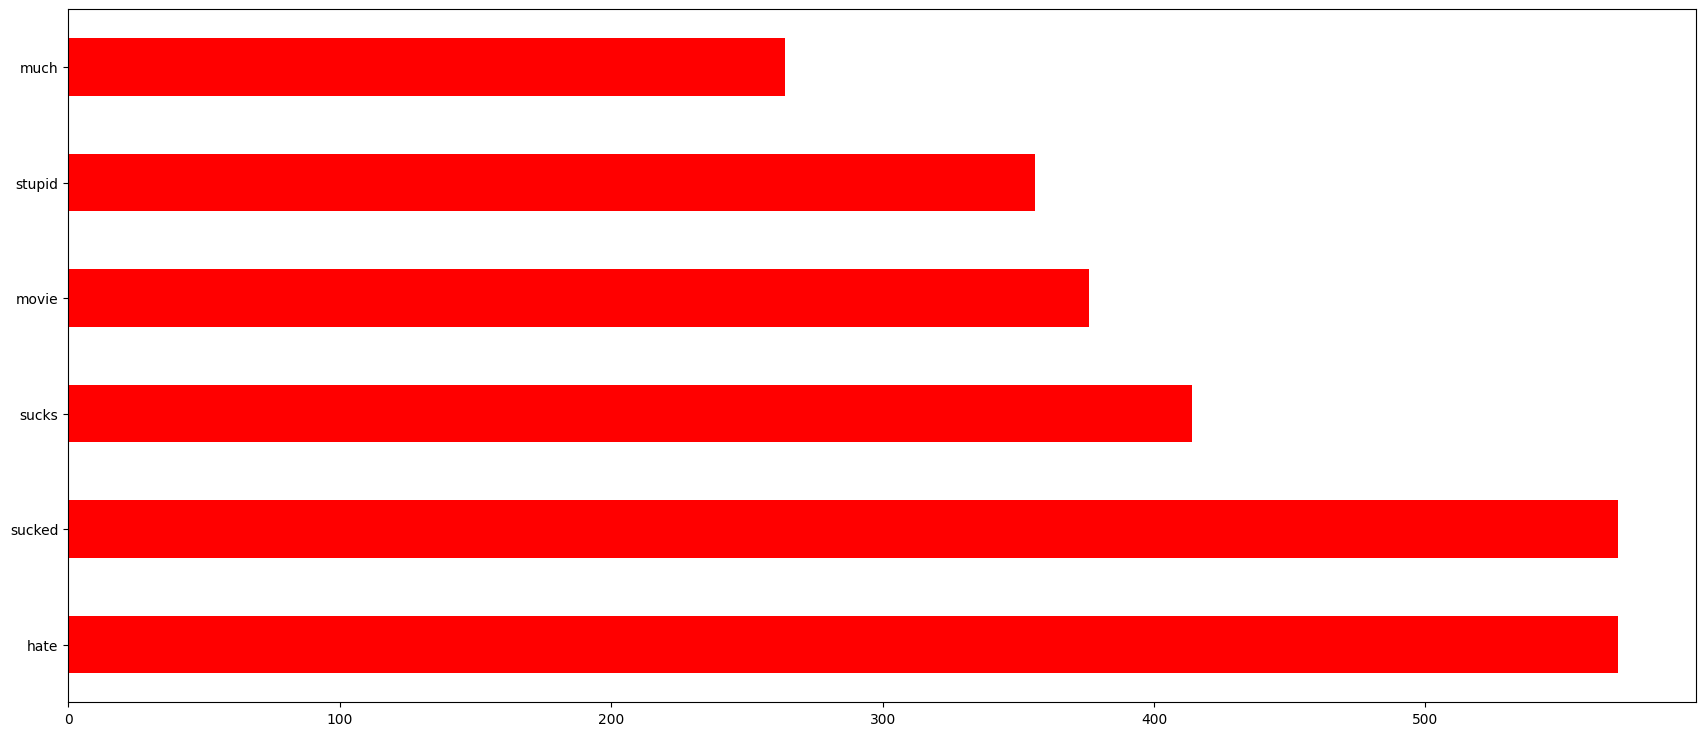

In [30]:
fig, ax = plt.subplots(figsize=(21, 9))
pd.Series(rev_neg_filtered).value_counts()[:6].plot(kind="barh", color = "red");

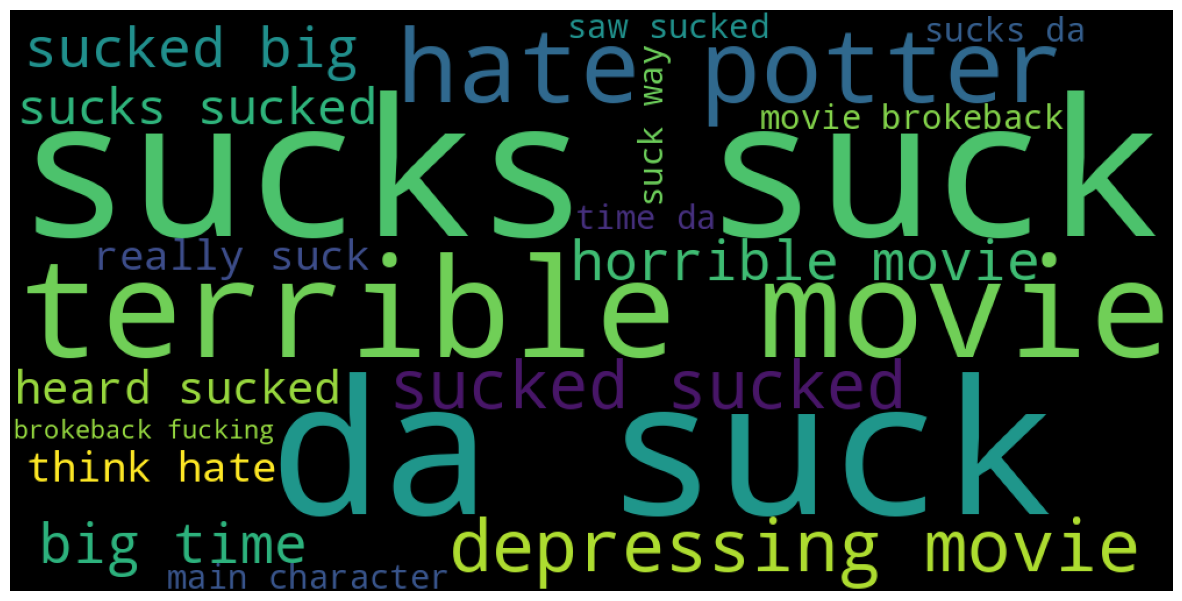

In [31]:
rev_neg_filtered_join = ' '.join(rev_neg_filtered) # Juntamos las palabras en un solo texto para que funcione el WordCloud

wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.6, max_words = 20).generate(rev_neg_filtered_join)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [32]:
rev_neg_filtered_adj = []

for pos_w in pos_tag(rev_neg_filtered):
    if pos_w[1].startswith('JJ'): # Nos quedamos solo con los adjetivos
        rev_neg_filtered_adj.append(pos_w[0])

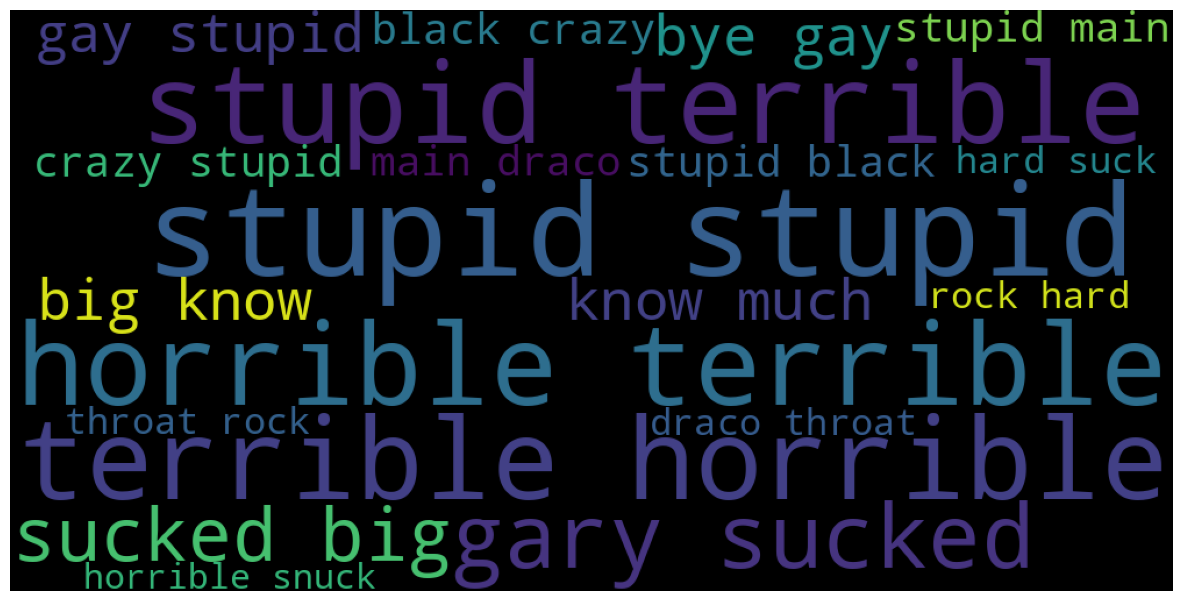

In [33]:
rev_neg_filtered_adj_join = ' '.join(rev_neg_filtered_adj) # Juntamos las palabras en un solo texto para que funcione el WordCloud

wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5, max_words = 20).generate(rev_neg_filtered_adj_join)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [34]:
w_rev_pos = word_tokenize(reviews_pos_join)

In [35]:
rev_pos_filtered = []

separators = [",", ".", "!", "?", "¿", "...", "...."]
nm_words = ["vinci", "code", "movie", "movies", "mountain", "mountain.i", "harry", "guy", "potter.i", "potter", "code", "n't", "brokeback", "mission", "impossible", "left", "right"]

for w in w_rev_pos:
  if w.lower() in separators:
    pass
  elif w.lower() in stopwords.words("english"):
    pass
  elif w.lower() in nm_words:
    pass
  elif len(w) < 3:
    pass
  else:
    rev_pos_filtered.append(w)

In [36]:
freq_w_rev_pos = FreqDist(rev_pos_filtered)
freq_w_rev_pos.most_common(20)

[('love', 1531),
 ('awesome', 994),
 ('like', 950),
 ('loved', 255),
 ('much', 187),
 ('really', 186),
 ('one', 180),
 ('know', 175),
 ('series', 174),
 ('want', 172),
 ('would', 172),
 ('people', 167),
 ('felicia', 160),
 ('beautiful', 124),
 ('book', 116),
 ('good', 108),
 ('read', 101),
 ('liked', 99),
 ('also', 97),
 ('first', 95)]

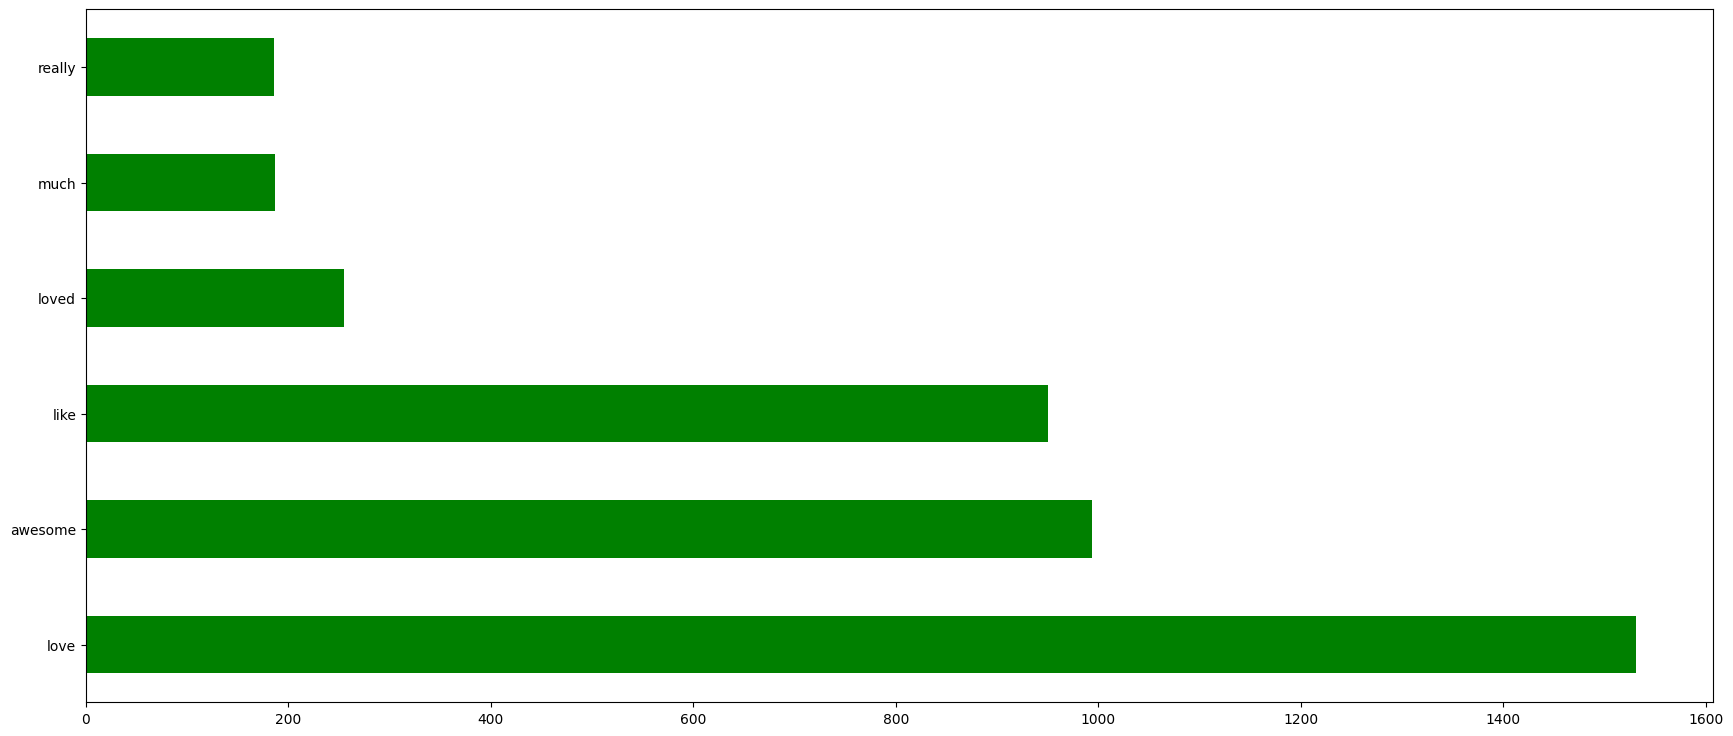

In [37]:
fig, ax = plt.subplots(figsize=(21, 9))
pd.Series(rev_pos_filtered).value_counts()[:6].plot(kind="barh", color = "green");

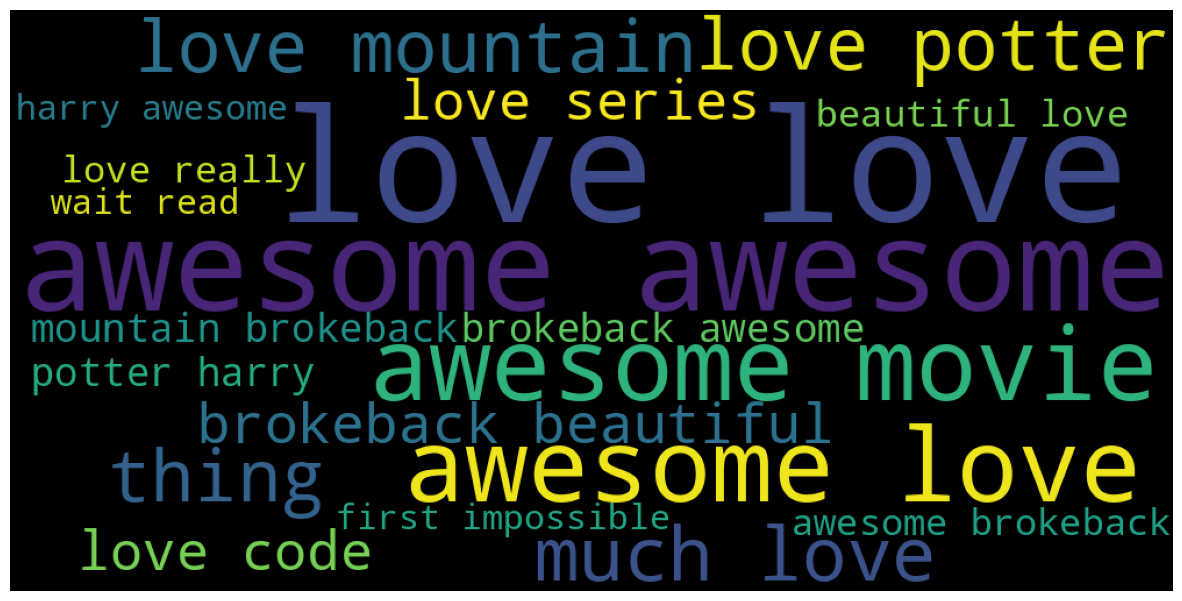

In [38]:
rev_pos_filtered_join = ' '.join(rev_pos_filtered) # Juntamos las palabras en un solo texto para que funcione el WordCloud

wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.6, max_words = 20).generate(rev_pos_filtered_join)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [39]:
rev_pos_filtered_adj = []

for pos_w in pos_tag(rev_pos_filtered):
    if pos_w[1].startswith('JJ'): # Nos quedamos solo con lo adjetivos
        rev_pos_filtered_adj.append(pos_w[0])

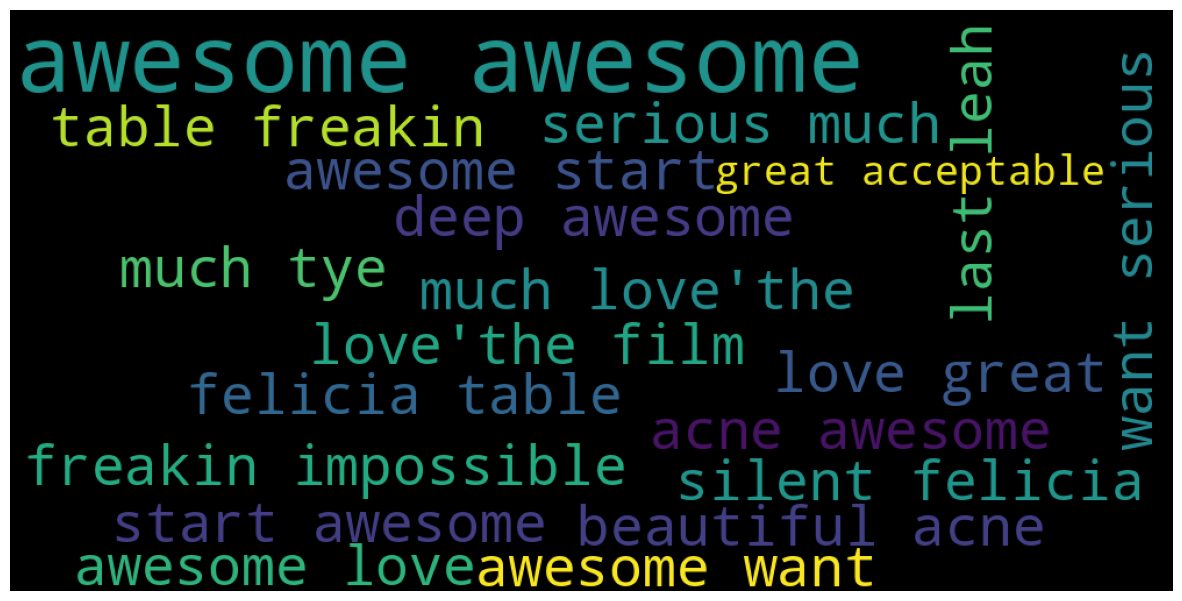

In [40]:
rev_pos_filtered_adj_join = ' '.join(rev_pos_filtered_adj) #Para juntar las palabras en un solo texto, para que funcione el WordCloud

wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5,  max_words = 20).generate(rev_pos_filtered_adj_join)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [41]:
from nltk.metrics.distance import edit_distance

In [42]:
w_1 = "sucks"
w_2 = "suck"

In [43]:
distance_w = edit_distance(w_1, w_2)
distance_w

1